<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/ARIMA_TIME_SERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/sample_data/shampoo_sales[1].csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [4]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


<Axes: >

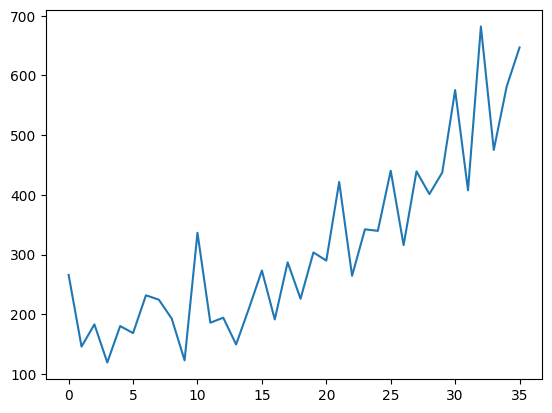

In [7]:
df["Sales"].plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

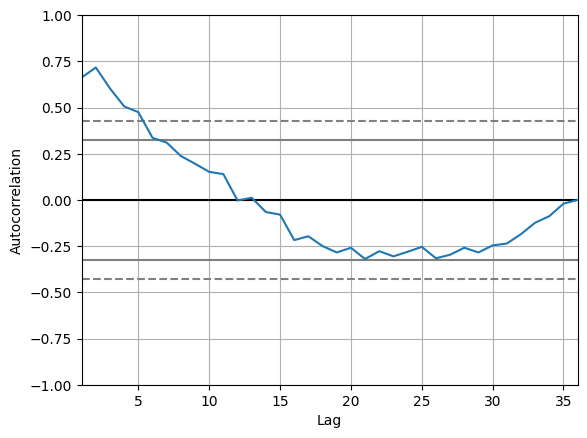

In [9]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

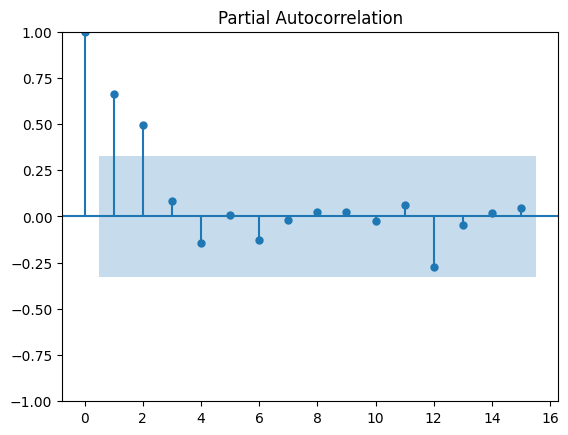

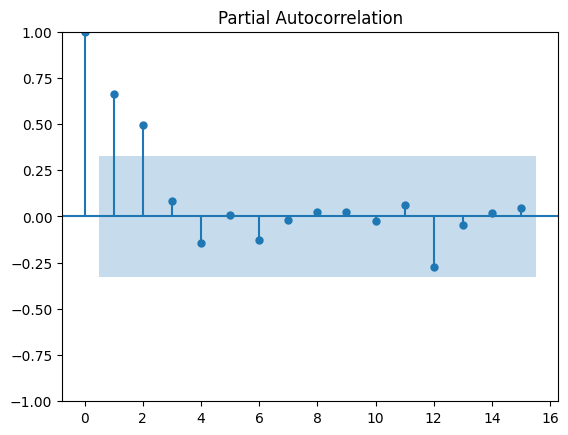

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Sales"], lags=15)

In [13]:
from statsmodels.tsa.arima.model import ARIMA  # Import the ARIMA class instead of the deprecated 'arima' function

In [14]:
model = ARIMA(df["Sales"], order=(2, 2, 5))

In [15]:
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 2, 5)   Log Likelihood                -189.635
Date:                Wed, 04 Sep 2024   AIC                            395.269
Time:                        20:53:15   BIC                            407.480
Sample:                             0   HQIC                           399.434
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9079      0.246     -7.740      0.000      -2.391      -1.425
ar.L2         -0.9544      0.219     -4.363      0.000      -1.383      -0.526
ma.L1         -0.0681     19.908     -0.003      0.997     -39.087      38.951
ma.L2         -1.8462      2.780     -0.664      0.507      -7.296       3.603
ma.L3          0.3025     19.854      0.015      0.988     -38.611      39.216
ma.L4          0.9883      2.812      0.351      0.725      -4.522       6.499
ma.L5         -0.1280      0.339     -0.377      0.706      -0.793       0.537
sigma2      2696.4798      0.014   1.94e+05      0.000    2696.453    2696.507
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.39   Prob(JB):                         0.92
Heteroskedasticity (H):               0.94   Skew:                            -0.01
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.43e+22. Standard errors may be unstable.
"""

,0
count,36.000000
mean,25.165622
std,86.508517
min,-251.672232
25%,-14.146637
50%,19.381997
75%,72.115921
max,266.000000


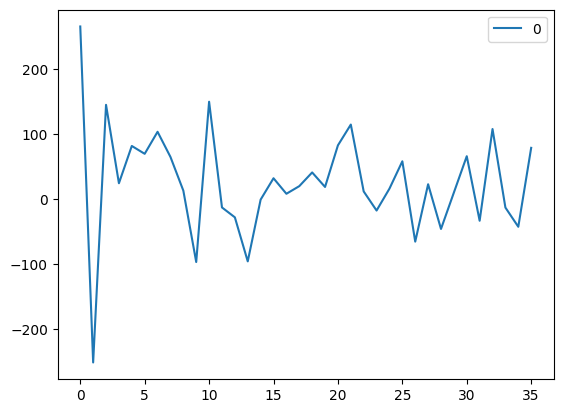

In [17]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.describe()

In [18]:
output = model_fit.forecast()
output
model_fit.forecast(5)

,predicted_mean
36,656.793409
37,637.268438
38,712.225321
39,710.395923
40,755.773986


In [19]:
df = pd.read_csv("/content/sample_data/shampoo_sales[1].csv")

In [20]:
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [21]:
train_size = int(df.shape[0] * 0.7)


In [22]:
train, test = df.Sales[0:train_size], df.Sales[train_size:]

In [23]:
test.shape

(11,)

In [30]:
data = train
predict = []
for t in test:
    model = ARIMA(data, order=(5, 1, 0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)

KeyError: 0

In [32]:
predict

[]